In [83]:
# Create an “Academic performance” dataset of students and perform the following operations using Python.
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
# Reason and document your approach properly.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns

In [85]:
df = pd.read_csv("https://raw.githubusercontent.com/GaneshPatil1806/PICT_SEM6/main/DSBDA/StudentsPerformance_modified.csv")

In [86]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [100]:
# checking for null/missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

In [88]:
# filling the values with the the mean 
df['math score'] = df['math score'].replace('?',np.nan)
df['math score'] = df['math score'].astype(float)
df['math score'] = df['math score'].fillna(df['math score'].mean())

In [89]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

In [90]:
# df=df.ffill()
# df=df.bfill()

In [91]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

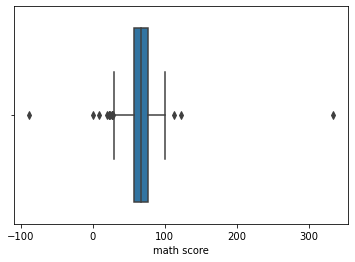

In [92]:
# checking for the ouliers
sns.boxplot(df['math score'])

In [93]:
# removing the outliers
q1 = df['math score'].quantile(0.25)
q3 = df['math score'].quantile(0.75)

iqr = q3 - q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

df = df[(df['math score'] > lb) & (df['math score'] < ub)]
# outliers['math score'].dropna()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

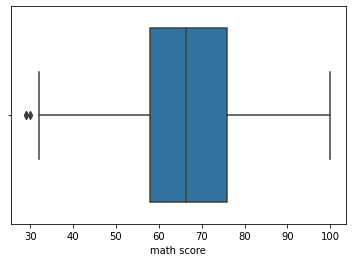

In [94]:
# after removing outliers
sns.boxplot(df['math score'])

<AxesSubplot:xlabel='writing score', ylabel='Count'>

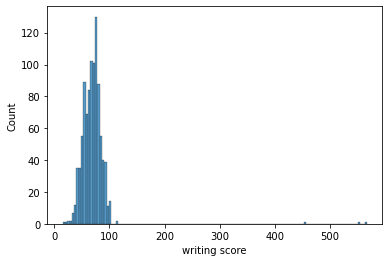

In [95]:
# appling data transformation over the var writing score
sns.histplot(df['writing score'])

In [96]:
df['writing score'].skew() 

11.747376277201528

In [97]:
df['writing score'] = np.sqrt(df['writing score'])

In [98]:
df['writing score'].skew() 

4.980432641684051

<AxesSubplot:xlabel='writing score', ylabel='Count'>

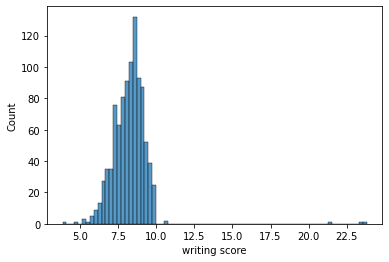

In [99]:
sns.histplot(df['writing score'])